# 18 - 异质性处理效应与个性化

## 从预测到因果推断

在上一章中，我们简要地介绍了机器学习模型。机器学习模型是一种用于“预测”的工具，或者更技术化地说，是用于估计条件期望函数 $E[Y|X]$。换句话说，当你想将已知的输入 $X$（例如一句英文句子、本月的销售额、脑部扫描图像）映射到一个最初未知但定义明确的输出 $Y$（如日文句子、下月销售额或者癌症诊断）时，机器学习非常有用。因此，既然机器学习处理的是预测或估计 $E[Y|X]$，要让它发挥作用，你就必须把你想用机器学习解决的问题表述为预测问题——一个以估计 $E[Y|X]$ 为关键的问题。上一章中我们走过这样一个例子：我们要根据客户的特征预测客户盈利能力，即 $E[NetValue|Age, Income, Region]$。这一信息非常有用，因为它让我们能够把精力集中在与盈利客户互动上，同时不与不盈利的客户做生意。在这里，准确预测盈利能力是关键。

请注意，这是一种被动估计方式，意味着你把自己从数据生成过程剥离出来。在我们的例子中，我们假定客户盈利能力 `NetValue` 是既定的，我们所要做的只是估计它。换句话说，我们假设除了预测客户的盈利能力外，我们没有办法去提高或降低它。但这并不总是正确的。事实上，很多时候公司可以通过某些杠杆来提高客户盈利能力。这些杠杆可以是更高端或更低廉的客户服务、折扣、定价或市场营销。在行业界，我们往往参与在数据生成过程中，我们能够影响它。因此，作为在行业中工作的数据科学家，我们经常要回答什么是最佳行动方案或应做出什么干预才能优化某些业务指标，通常是盈利或某些中间指标，如转化率、成本或销售额。

在这个我们不再是被动观察者的世界里，仅仅估计 $E[Y|X]$ 并不完整。这就是我们进入因果推断的地方。我们需要在条件期望函数中再加入一项，这一项正是用来刻画我们对数据生成过程的影响。这一项就是处理变量：

$$
E[Y|X, T]
$$

现在我们必须区分情境或外生特征 $X$ 和处理变量 $T$。两者都会影响结果 $Y$，但我们无法控制 $X$，却可以决定 $T$ 的取值或至少对其进行干预。举个具体的例子，$Y$ 可以是某一天的销售额，$X$ 可以是我们不能控制但能提供关于销售信息的背景特征，如前几日的平均销售额，而 $T$ 是我们可以干预以提高销售的处理变量，如价格、库存水平或市场营销。因果推断就是在给定情境 $X$ 下，估计 $T$ 与 $Y$ 之间因果关系的过程。一旦我们完成了这一步，优化 $Y$ 就只是选择一个最优的处理值 $T$：

$$
\underset{T}{argmax} \ E[Y|X, T]
$$

从这个意义上讲，除了因果推断的积极方面，我们还有规范性的动机。

在第一部分中，我们试图回答的问题包括：接受教育的价值是多少？法律改革能否降低吸烟率？保持积极心态能否提升学术成就？酒精对死亡率的影响如何？所有这些问题从纯科学的角度看都很有趣，因为它们帮助我们理解世界是如何运作的。但这些问题背后也有实践动机。如果我们知道教育对收入的影响，我们就能理解为教育付出多少代价是合理的。从数学上看，我们所做的是估计教育的因果效应并对其进行优化：$\underset{Educ}{argmax} \ E[Income|X, Educ]$。

第一部分的重点是回答某种处理总体上是正的、强的还是为零。例如，我们想知道投资教育通常是否值得。同时在第一部分中，$X$ 的作用有两个方面。首先，$X$ 可能包含混杂变量，在这种情况下，只有当我们考虑或调整 $X$ 时，因果效应才是可识别的；或者，$X$ 可以用来减小因果估计的方差。如果 $X$ 是 $Y$ 的良好预测变量，我们可以用它来解释掉 $Y$ 的变异，使得因果效应更加明显。

现在，事情不再是非黑即白的了。我们想要的不仅仅是平均处理效应。我们将允许处理对某些人有积极影响，对另一些人却没有。情境特征 $X$ 将在定义不同单元的不同特征组合上发挥作用，而每种特征组合可能对处理有不同的反应。我们现在希望实现处理的个性化，只把处理给予对其反应最好的人群。我们从一个只关心平均处理效应的世界，走向了一个我们想要异质性处理效应的世界。


## 从平均处理效应到条件平均处理效应（CATE）

到目前为止，每次我们估计某一处理的因果影响时，得到的都是平均处理效应（有时是局部平均处理效应）：

$$
E[Y_1 - Y_0]
$$

或其对应的连续处理形式

$$
E[y'(t)]
$$

其中 $y'(t)$ 是响应函数或结果的处理导数。我们学习了若干技术来揭示处理的整体有效性。平均处理效应估计是因果推断的基石，它是一个非常有用的工具，用于我们称之为项目评价的决策问题——我们想知道是否应该将某项干预推向整个总体。不要被公共政策的术语迷惑，同样的技术也可以用来评估推出新产品对企业盈利的影响。这里关键要注意的是，我们要支持的决策是是否应当对所有人实施处理。

现在，我们要考虑另一种类型的决策：**应该对谁实施处理？** 现在，决策可以在不同个体之间变化。对某个个体施加处理可能是有利的，但对另一个则未必。我们希望个性化处理。更技术地说，我们要估计条件平均处理效应（CATE）

$$
E[Y_1 - Y_0 \ |\ X] \quad\text{或}\quad E[y'(t)\,|\,X]
$$

在 $X$ 上条件意味着我们现在允许处理效应根据每个单位的特征而不同。同样在这里，我们认为并非所有个体对处理反应相同，我们想利用这种异质性。我们希望只对正确的单位施加处理（在二元处理的情况下），或者确定每个单位的最优处理剂量（在连续处理的情况下）。

举个例子，如果你是一家银行，需要决定每个客户能够获得多大的贷款，你可以肯定地说盲目给每个人大量贷款不是好主意——虽然对于某些人可能合理。你必须聪明地设计你的处理（贷款金额）。或许，根据客户的信用评分（$X$），你可以找出合适的贷款额度。当然，你不必是大型机构才能利用个性化。此类例子不胜枚举：一年中的哪些天应该打折促销？某个产品应该定价多少？每个人应该运动多长时间才适合？

换个角度思考。你有一堆客户和一个处理变量（价格、折扣、贷款等）。你希望个性化处理，例如给不同的客户不同的折扣。

![img](./images/18/customers.png)

为此，你必须对客户进行分组。你创建了对处理反应不同的群组。例如，你要找出对折扣反应好的客户和反应差的客户。客户对处理的反应由条件处理效应 $\frac{\delta Y}{ \delta T}$ 给出。因此，我们可以设法为每个客户估计这一效应，然后把那些对处理反应强烈的（高处理效应）和那些反应不那么强烈的分到一起。如果这么做，我们将像下图那样划分客户空间。

![img](./images/18/elast-partition.png)

这非常棒，因为我们可以在每个分区中估计不同的处理效应或敏感度。注意，敏感度正是从 $T$ 到 $Y$ 的曲线或函数的斜率。因此，如果我们能够产生斜率或敏感度不同的分区，就意味着这些分区中的实体对处理的反应不同。

![img](./images/18/elast-split.png)

换言之，你想做的是不再预测 $Y$ 的原始值，而是开始为每个单位预测 $Y$ 对 $T$ 的导数，即 $\frac{\delta Y}{ \delta T}$。例如，假设 $Y$ 是冰淇淋销售量，$T$ 是冰淇淋价格，每个单位 $i$ 是一天。撇开道德问题不谈，假设你可以每天改变冰淇淋的价格。如果你能找出那些 $\frac{\delta Sales}{ \delta Price}$ **很低**的日子，那么在那些日子里你就可以**提高价格**而不会损失太多销量。也许你已经在这么做，比如在假日季提价。关键是，按价格敏感度区分不同的日子很有用，因为它为你如何设定最优价格提供了依据。

你可能会说，这有点棘手。如果我看不到 $\frac{\delta Sales}{ \delta Price}$，如何预测敏感度？这是个很好的问题。敏感度在单个单位层面上实际上是不可观察的。不仅如此，这还是一个陌生的概念。我们更习惯于按原始数量思考，而不是按这些数量的变化率来思考。为了更好地概念化敏感度，这里有个小技巧。你可以把每个个体看成既有一个 $Y_i$ 值（在我们的例子中是销售量），又有一个个体敏感度 $\frac{\delta Y_i}{\delta T_i}$。敏感度就是 $Y$ 随 $T$ 的变化量，所以你可以把每个个体看成还有一个斜率系数 $\frac{\delta Y}{ \delta T}_i$。在我们的例子中，我们会说每一天都有一个价格对销量的斜率系数。

![img](./images/18/elasticity.png)

当然，我们无法看到这些个体的斜率系数。若要看到个体的斜率，我们必须观察每一天在两个不同价格下的销售量，并计算销售量在这两个价格下的变化：

$$
\frac{\delta Y_i}{ \delta T_i} \approx \frac{Y(T_i) - Y(T_i + \epsilon)}{T_i - (T_i + \epsilon)}
$$

这正是因果推断的基本问题的重现：我们永远无法看到同一单位在不同处理条件下的表现。那么，我们该怎么办呢？


## 预测敏感度

我们又遇到了一个棘手问题。我们已经同意需要预测 $\frac{\delta Y_i}{ \delta T_i}$，然而遗憾的是它不可观测。因此我们无法将其作为目标直接交给机器学习算法去学习。但也许，预测它并不需要直接观测 $\frac{\delta Y_i}{ \delta T_i}$。

这里有一个想法：假如我们使用线性回归呢？

![img](./images/18/linear-fix.png)

假设你对数据拟合如下线性模型：

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + e_i
$$

如果对该模型对处理变量求导，将会得到

$$
\frac{\delta y_i}{\delta t_i} = \beta_1 
$$

既然我们可以估计上述模型并得到 $\hat{\beta_1}$，我们甚至可以大胆地说，**即使不能观察敏感度，也能预测它**。在上述情形中，预测非常简单——我们为每个人预测相同的常数值 $\hat{\beta_1}$。这当然是有用的，但还不是我们想要的。这只是平均处理效应，而不是条件平均处理效应。由于每个人得到的敏感度预测相同，这并不利于按照对处理的响应程度来对个体进行分组。为了解决这一点，我们可以做如下简单的修改：

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 \, t_i X_i \, + e_i
$$

这将产生如下的敏感度预测：

$$
\widehat{\frac{\delta y_i}{\delta t_i}} = \hat{\beta_1} + \hat{\beta_3}X_i
$$

其中 $\beta_3$ 是 $X$ 中特征的向量系数。

现在，由不同的 $X_i$ 所定义的每个实体都会有不同的敏感度预测。换言之，敏感度预测随着 $X$ 的变化而变化。因此，回归为我们提供了一种估计 CATE $E[y'(t)|X]$ 的方法。

我们终于走出了一步。上述模型使得我们能够为每个实体做出敏感度预测。有了这些预测，我们就可以构建更有用的分组：把预测敏感度高的单位归为一组，把预测敏感度低的单位归为另一组。总之，凭借敏感度预测，我们可以按照我们认为各实体对处理的响应程度来对其进行分组。

理论讲得够多了。现在是时候通过一个例子来展示如何构建这类敏感度模型。考虑我们的冰淇淋例子。每个单位 $i$ 是一天。对于每一天，我们知道它是否是工作日、制作冰淇淋的成本（你可以把成本视为质量的一个代理），以及当天的平均温度。这些构成了我们的特征空间 $X$。然后我们有处理变量——价格，以及结果变量——售出的冰淇淋数量。在此例中，我们假定处理是随机的，这样暂且不用担心偏倚。


In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [8]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
print(prices_rnd.shape)
prices_rnd.head()

(5000, 5)


,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


请记住我们的目标：根据每日的特征 `temp`（温度）、`weekday`（是否工作日）和 `cost`（成本）决定何时提高价格、何时降低价格。如果这就是目标，那么处理效应异质性模型必须按照其在实现该目标中的效用来评估。我们马上会讨论这一点（并将在下一章详细展开）。眼下，我们先将数据集划分为训练集和测试集。


In [12]:
np.random.seed(123)
train, test = train_test_split(prices_rnd)

现在我们有了训练数据，需要构建一个模型，使我们能够区分对价格高度敏感的日子和对价格不敏感的日子。我们的做法很简单：直接预测价格敏感度。具体怎么做呢？首先，让我们考虑使用如下线性模型：

$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2} X_i + e_i
$$

通过查看该模型的参数，我们可以看到预测的敏感度会是什么样子。


In [15]:
m1 = smf.ols("sales ~ price + temp+C(weekday)+cost", data=train).fit()
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,186.7113,1.770,105.499,0.000,183.241,190.181
C(weekday)[T.2],-25.0512,0.924,-27.114,0.000,-26.863,-23.240
C(weekday)[T.3],-24.5834,0.901,-27.282,0.000,-26.350,-22.817
C(weekday)[T.4],-24.3807,0.897,-27.195,0.000,-26.138,-22.623
C(weekday)[T.5],-24.9036,0.894,-27.850,0.000,-26.657,-23.150
C(weekday)[T.6],-24.0921,0.903,-26.693,0.000,-25.862,-22.323
C(weekday)[T.7],-0.8635,0.888,-0.972,0.331,-2.605,0.878
price,-2.7515,0.106,-25.970,0.000,-2.959,-2.544
temp,1.9848,0.060,33.117,0.000,1.867,2.102
cost,4.4718,0.528,8.462,0.000,3.436,5.508


对于模型 $m1$，预测的价格敏感度 $\widehat{\dfrac{\delta y_i}{\delta t_i}}$ 等于 $\hat{\beta_1}$，在我们的例子中为 -2.75。这意味着冰淇淋价格每上涨 1 巴西雷亚尔，预计销量将下降约 3 单位。

注意，$m1$ 为每个人预测的敏感度完全相同。因此，如果我们想知道哪些日子人们对冰淇淋价格不那么敏感，它就不是一个很好的模型。它估计的是平均处理效应，而我们这里需要的是条件平均处理效应。记住，我们的目标是将实体划分成不同的组，以便为每个分组个性化并优化我们的处理（价格）。如果所有预测都是一样的，就没有办法划分。我们没有区分出敏感和不敏感的单位。为了解决这个问题，考虑第二个模型：

$$
sales_i = \beta_0 + \beta_1 price_i + \beta_2 \, price_i \times temp_i \, + \pmb{\beta_3} X_i + e_i
$$

这个第二个模型包括价格与温度之间的**交互项**，这意味着它允许敏感度在不同温度下有所不同。我们实际上是在说，人们对价格上涨的敏感程度取决于温度的高低。


In [18]:
m2 = smf.ols("sales ~ price*temp + C(weekday) + cost", data=train).fit()
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,192.4767,4.371,44.037,0.000,183.907,201.046
C(weekday)[T.2],-25.0805,0.924,-27.143,0.000,-26.892,-23.269
C(weekday)[T.3],-24.5871,0.901,-27.290,0.000,-26.354,-22.821
C(weekday)[T.4],-24.4225,0.897,-27.231,0.000,-26.181,-22.664
C(weekday)[T.5],-24.8953,0.894,-27.844,0.000,-26.648,-23.142
C(weekday)[T.6],-24.1269,0.903,-26.726,0.000,-25.897,-22.357
C(weekday)[T.7],-0.8581,0.888,-0.966,0.334,-2.599,0.883
price,-3.6299,0.618,-5.873,0.000,-4.842,-2.418
temp,1.7459,0.176,9.912,0.000,1.401,2.091
price:temp,0.0366,0.025,1.443,0.149,-0.013,0.086


一旦我们估计了该模型，预测的敏感度为

$$
\widehat{\frac{\delta sales_i}{\delta price_i}} = \hat{\beta_1} + \hat{\beta_2} \, temp_i
$$

注意，$\hat{\beta_2}$ 为正值 0.03，而基线敏感度 $\beta_1$（在 0 摄氏度的敏感度）是 -3.6。这意味着平均而言，当价格上升时，销量会下降，这是合理的。这也意味着温度每上升一度，人们对冰淇淋价格上涨的敏感度会降低（虽然幅度不大）。例如，在 25 摄氏度时，冰淇淋价格每上涨 1 巴西雷亚尔，销量下降 2.8 单位 $(-3.6 + (0.03 \times 25))$；而在 35 摄氏度时，价格每上涨 1 雷亚尔，销量只下降 2.5 单位 $(-3.6 + (0.03 \times 35))$。这也算是直观的：天气越热，人们越愿意为冰淇淋支付更高的价格。

我们还可以更进一步。下一个模型在整个特征空间上加入了交互项。这意味着敏感度会随着温度、星期几以及成本而变化。

$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2 X_i} \times price_i + \pmb{\beta_3} X_i + e_i
$$


In [21]:
m3 = smf.ols("sales ~ price*cost + price*C(weekday) + price*temp", data=train).fit()

根据上述模型，单位层面的敏感度，也即 CATE，可以表示为

$$
\frac{\delta Sales}{\delta Price} = \beta_1 + \pmb{\beta_2 X_i}
$$

其中 $\beta_1$ 是价格系数，$\pmb{\beta_2}$ 是交互项系数的向量。

最后，让我们看看如何实际做出这些敏感度预测。一种方法是直接从模型中提取敏感度参数并使用上面的公式。然而，我们将采用一种更通用的近似方法。既然敏感度不过是结果对处理的导数，我们可以利用导数的定义：

$$
\frac{\delta y}{\delta t} = \dfrac{y(t+\epsilon) - y(t)}{ (t + \epsilon) - t }
$$

其中 $\epsilon$ 趋于零。我们可以用 $\epsilon = 1$ 来近似这个定义：

$$
\frac{\delta y}{\delta t} \approx \hat{y}(t+1) - \hat{y}(t)
$$

这里的 $\hat{y}$ 是模型的预测值。换句话说，我将用模型做两次预测：一次使用原始数据，另一次使用将处理变量增加一个单位的原始数据。这两个预测的差就是我的 CATE 预测。

下面可以看到一个实现这一操作的函数。由于我们已经使用训练集估计了模型，现在将在测试集上做预测。首先让我们使用第一个平均处理效应模型 $m1$。


In [24]:
def pred_sensitivity(m, df, t="price"):
    return df.assign(**{
        "pred_sens": m.predict(df.assign(**{t:df[t]+1})) - m.predict(df)
    })

pred_sensitivity(m1, test).head()

,temp,weekday,cost,price,sales,pred_sens
2648,18.6,7,0.5,10,185,-2.751463
2456,26.0,3,0.5,10,200,-2.751463
4557,23.7,3,0.3,8,192,-2.751463
4884,28.9,4,1.5,6,213,-2.751463
92,23.7,1,0.5,8,207,-2.751463


使用模型 $m1$ 来预测敏感度毫无趣味。我们可以看到它对所有天都预测完全相同的值。这是因为该模型没有任何交互项。然而，如果我们使用模型 $m3$ 进行预测，它会为每一天输出不同的敏感度预测。这是因为此时敏感度或处理效应取决于当天的特征。


In [27]:
pred_sens3 = pred_sensitivity(m3, test)

np.random.seed(1)
pred_sens3.sample(5)

,temp,weekday,cost,price,sales,pred_sens
4764,31.1,6,1.0,3,212,1.144309
4324,24.8,7,0.5,10,182,-9.994303
4536,25.0,2,1.5,6,205,0.279273
3466,26.0,3,1.5,3,205,0.308320
115,19.3,3,0.3,9,177,-0.349745


注意这些预测的数值大约在 -9 到 1 之间。它们并不是对销售量列的预测，后者的数量级在数百。相反，**它们是对将价格提高一个单位时销售量将变化多少的预测**。一开始我们会看到一些奇怪的数字。例如，看看第 4764 天，它预测了正的敏感度。换句话说，我们预测如果提高冰淇淋价格，销量会增加。这与经济常识不符，很可能是模型在该点进行了奇怪的外推。幸运的是，你不必过于担心这一点。记得我们的最终目标是按单位对处理的敏感程度进行分组，**并不是**要得到最准确的敏感度预测。为达成我们的主要目标，只要敏感度预测能按照敏感度大小对单位排序即可。换句话说，即使像 1.1 或 0.5 这样的正敏感度预测看起来没有意义，我们所需要的只是排序正确，即预测值为 1.1 的单位对价格上涨的影响小于预测值为 0.5 的单位。

好的，我们有了敏感度或 CATE 模型。但仍然有一个潜在的问题：它们与传统的机器学习预测模型相比如何？现在让我们试一下。我们将使用一种机器学习算法，把价格、温度、是否工作日以及成本作为特征 $X$，并尝试预测冰淇淋的销量。


In [30]:
X = ["temp", "weekday", "cost", "price"]
y = "sales"
ml = GradientBoostingRegressor()
ml.fit(train[X], train[y])

# make sure the model is not overfiting.
ml.score(test[X], test[y])

0.9124088322890127

该模型可以预测每天的销售量。但是它适合我们的真正需求吗？换言之，这个模型能区分哪些天人们对冰淇淋价格更敏感吗？它能帮助我们根据价格敏感度决定收取多少费用吗？

为了看哪种模型更有用，让我们尝试利用它们来分割单位。对于每个模型，我们都将把单位划分为两组。我们希望其中一组对价格上涨反应强烈，另一组反应不那么明显。如果的确如此，我们就可以围绕这些分组来安排业务：对于落在高反应性组的日子，最好不要把价格定得太高；而对低反应性组，我们可以提高价格，而不会过多损失销量。


In [33]:
bands_df = pred_sens3.assign(
    sens_band = pd.qcut(pred_sens3["pred_sens"], 2), # create two groups based on sensitivity predictions 
    pred_sales = ml.predict(pred_sens3[X]),
    pred_band = pd.qcut(ml.predict(pred_sens3[X]), 2), # create two groups based on sales predictions
)

bands_df.head()

,temp,weekday,cost,price,sales,pred_sens,sens_band,pred_sales,pred_band
2648,18.6,7,0.5,10,185,-10.301045,"(-10.597999999999999, -0.00555]",186.878081,"(161.089, 198.735]"
2456,26.0,3,0.5,10,200,0.036165,"(-0.00555, 1.389]",203.188327,"(198.735, 257.746]"
4557,23.7,3,0.3,8,192,-0.132057,"(-10.597999999999999, -0.00555]",188.800637,"(161.089, 198.735]"
4884,28.9,4,1.5,6,213,0.860663,"(-0.00555, 1.389]",210.430813,"(198.735, 257.746]"
92,23.7,1,0.5,8,207,-9.953698,"(-10.597999999999999, -0.00555]",209.044522,"(198.735, 257.746]"


接下来，我们需要比较这两种分割方案中哪一种更好。我现在可能有点超前了，因为我们只有在下一章才会详细讨论 CATE 模型的评估。不过我想给你提前看看它的样子。一个非常简单的办法来检验这些分区方案的效果——这里的“好”指的是实用——就是在每个分区中绘制价格对销量的回归线。我们可以利用 Seaborn 的 `regplot` 加上 `FacetGrid` 来轻松实现。

下面，我们可以看到利用敏感度预测所做的分区。请记住，所有这些都在测试集上完成。


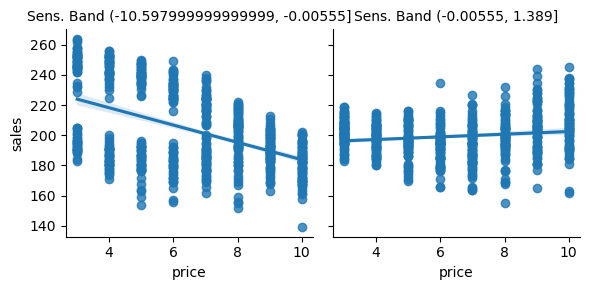

In [36]:
g = sns.FacetGrid(bands_df, col="sens_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Sens. Band {col_name}");

正如我们所看到的，这种划分方案似乎是有用的。在第一组中，价格敏感度很高。随着价格的上涨，销量大幅下降。然而在第二组中，随着价格上涨，销量大致保持不变。实际上，销量看起来甚至会随着价格的提高而上升，但这很可能是噪声。

对比用机器学习预测模型做出的分区：


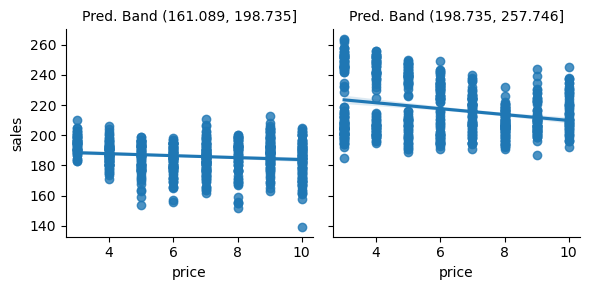

In [39]:
g = sns.FacetGrid(bands_df, col="pred_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Pred. Band {col_name}");

我非常喜欢这幅图，因为它传达了一个重要的观点。如你所见，预测模型的分区是在 y 轴上分割单位。在第一组那样的日子，我们卖出的冰淇淋不多，而在第二组那样的日子，我们卖得更多。我觉得这很神奇，因为预测模型正是在做它应该做的事情：预测销售量。它能区分冰淇淋销量低的日子和销量高的日子。

唯一的问题是这种预测在这里并不是特别有用。最终我们想知道什么时候可以提价，什么时候不能。但是当我们查看预测模型分区中回归线的斜率时，会发现它们几乎没有变化。换句话说，由预测模型所定义的两个分区对价格上涨的响应程度几乎相同。这并不能为我们提供多少关于哪些日子可以提高价格的洞见，因为看起来价格对销量根本没有影响。

## 关键观点

我们终于正式提出了条件平均处理效应的概念，以及它如何在个性化中发挥作用。也就是说，如果我们能够理解每个单位如何对处理作出反应，也即理解处理效应的异质性，那么我们就可以根据单位的个体特征给予最佳的处理。

我们还将这一目标与预测模型的目标进行了对比。我们正在重新思考估计任务，从预测 $Y$ 的原始形式转变为预测 $Y$ 随 $T$ 的变化率 $\frac{\delta y}{\delta t}$。

遗憾的是，如何为此构建模型并不明显。由于我们无法直接观察敏感度，很难建立一个能够预测它的模型。但线性回归来帮忙了。通过拟合一个预测 $Y$ 的回归模型，我们找到了一种方法来同时预测 $\frac{\delta y}{\delta t}$。我们还必须加入处理与特征的交互项。这样一来，我们的敏感度预测对每个顾客都不同。换句话说，我们实际上是在估计 $E[Y'(t) \,|\, X]$。然后利用这些敏感度预测，我们将单位分成对处理更敏感和不那么敏感的两类，最终帮助我们为每个分组决定合适的处理水平。

![img](./images/18/economists.png)

由此产生的一个自然问题是，我们是否可以用一种通用的机器学习模型替代线性回归，用它来预测敏感度？答案是可以的，但需要注意一些细节。本章使用了一个非常简单的 CATE 模型，因为我认为用线性回归更容易理解其背后的概念。不过别担心，在接下来的章节中我们会看到一些更复杂的模型。但在那之前，我需要先讲解一个非常重要的话题，即如何比较两个 CATE 模型并决定哪个更好。

## 参考说明

本章内容主要基于作者个人的经验总结，许多观点和方法源自实践中的体会。因此，无法提供严格意义上的学术参考文献。与正规科研工作不同，这些内容没有经过系统性的学术审查，也未经过同行评议与理论论证。读者或许会注意到，本文更多讨论的是“实践中有效的方法”，而非详细阐述其背后的理论基础。这种方法可以被视为“来自一线的经验科学”（a sort of science from the streets）。尽管如此，既然这些内容已公开发布，也非常欢迎批评与反馈——如果读者发现其中有明显错误或不妥之处，欢迎提出 issue，作者会尽力回应。

最后，对于那些希望系统学习机器学习的读者，作者也意识到本章的讲解可能过于简略。坦率地说，作者认为自己真正能够贡献价值的领域是因果推断的教学，而非机器学习。机器学习领域已有大量优质的公开资源，远超作者所能提供的内容。其中的经典之作，就是 [Andrew Ng 的机器学习课程](https://www.coursera.org/learn/machine-learning)，如果读者是机器学习初学者，作者强烈推荐认真学习这门课程。


## 参与贡献

**《Causal Inference for the Brave and True》** 是一本关于因果推断的开源教材，致力于以经济上可负担、认知上可理解的方式，普及这门“科学的统计基础”。全书基于 Python，仅使用自由开源软件编写，原始英文版本由 [Matheus Facure](https://github.com/matheusfacure) 编写与维护。

本书的中文版由黄文喆与许文立助理教授合作翻译，并托管在 [GitHub 中文主页](https://github.com/Wenzhe-Huang/python-causality-handbook-zh)。希望本地化的内容能帮助更多中文读者学习和掌握因果推断方法。

如果你觉得这本书对你有帮助，并希望支持该项目，可以前往 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true) 支持原作者。

如果你暂时不方便进行经济支持，也可以通过以下方式参与贡献：

* 修正错别字
* 提出翻译或表达建议
* 反馈你未能理解的部分内容

欢迎前往英文版或中文版仓库点击 [issues 区](https://github.com/matheusfacure/python-causality-handbook/issues) 或 [中文版 issues 区](https://github.com/Wenzhe-Huang/python-causality-handbook-zh/issues) 提出反馈。

最后，如果你喜欢这本书的内容，也请将其分享给可能感兴趣的朋友，并为项目在 GitHub 上点亮一颗星：[英文版仓库](https://github.com/matheusfacure/python-causality-handbook) / [中文版仓库](https://github.com/Wenzhe-Huang/python-causality-handbook-zh)。
